In [135]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [136]:
data_set=pd.read_csv("archive/Mall_Customers.csv")

In [137]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [138]:
data=data_set[['Annual Income (k$)','Spending Score (1-100)']]

In [139]:
data.shape

(200, 2)

In [140]:
per=data.to_numpy()

In [141]:
def init_centroids(x, k):
    random = np.random.permutation(x.shape[0])[:k]
    centroids = x[random]
    return centroids

def find_distance(x,centroid):
    k=centroid.shape[0]
    n=x.shape[0]
    d=np.zeros((k,n))
    for i in range(k):
        d[i]=np.sqrt(np.power((x-centroid[i]),2).sum(axis=1))
    return d.argmin(axis=0)

def calcul_centroid(x,d,k):
    centroid=np.zeros((k,x.shape[1]))
    for i in range(k):
        centroid[i]=np.mean(x[d==i],axis=0)
    return centroid

def kmean(x,centroid,iteration):
    for i in range(iteration):
        dix=find_distance(x,centroid)
        centroid=calcul_centroid(x,dix,centroid.shape[0])
    return dix,centroid


In [142]:
k = 5               
iters = 1000

centroid=init_centroids(per, k)
idx,centroid=kmean(per,centroid,iters)

In [143]:
print(centroid)

[[26.30434783 20.91304348]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]]


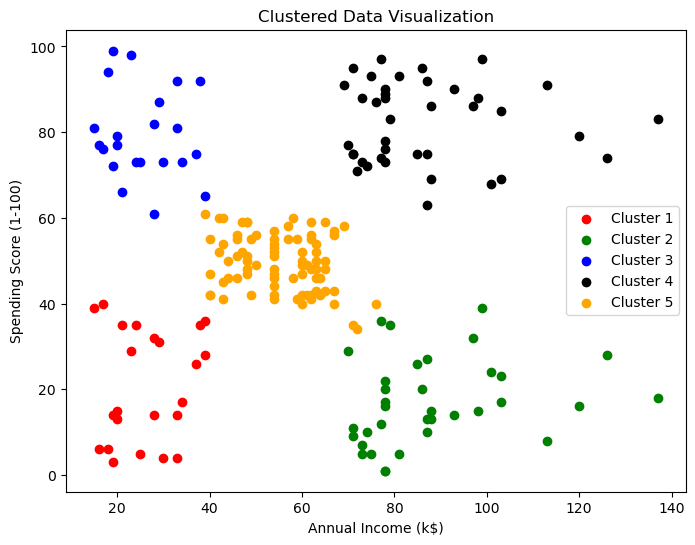

In [144]:
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue','black','orange']

for i in range(k):
    cluster_points = per[idx == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustered Data Visualization')
plt.legend()

plt.show()